# Importing the Data

In [34]:
# Importing basic Libraries for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', 10)

In [35]:
df = pd.read_csv('Data/combined_df.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51199 entries, 0 to 51198
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Head          51104 non-null  object
 1   Body          50902 non-null  object
 2   Tags          50888 non-null  object
 3   First Answer  25555 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB


In [37]:
df.describe()

,Head,Body,Tags,First Answer
count,51104,50902,50888,25555
unique,48978,48809,37079,24429
top,R's lmer cheat sheet,\nThere's a lot of discussion going on on this...,['data-request'],What's the difference between (~1 +....) and (...
freq,5,5,357,5


In [38]:
df.isna().sum()

Head               95
Body              297
Tags              311
First Answer    25644
dtype: int64

* We can see that the are some missing values in the dataset. First Answer features have 50% missing values.
* Without taking this column into consideration, we can see that there are 3 columns with missing values. now we will clean those features.

In [39]:
wofa_df = df.drop('First Answer', axis=1).copy()
wofa_df

,Head,Body,Tags
0,Brain Segmentation To 3D Model,\r\nMy goal is to take a dataset of Brain Tumo...,"['computer-vision', 'python']"
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,Active Learning regression with Random Forest,\r\nI have a dataset of about 8k points and I ...,"['machine-learning', 'regression', 'uncertaint..."
4,Comparing Reinforcement Learning models,\r\nI am currently completing my thesis on opt...,"['reinforcement-learning', 'policy-gradients',..."
...,...,...,...
51194,Where to get older digital OCR'd data sets of ...,\nI am trying to locate older unsummarized US ...,"['data-request', 'usa', 'us-census']"
51195,Orthophoto Rwanda Free Download?,\nI'm looking for Image datas for East Africa....,"['data-request', 'images', 'aerial-photography..."
51196,finding online finance datasets,\nI am searching for finance datasets that has...,"['data-request', 'finance']"
51197,HealthCare Finder API Links Broken?,\nIt seems that the HealthCare Finder API sche...,['healthcare-finder-api']


In [40]:
wofa_df.describe()

,Head,Body,Tags
count,51104,50902,50888
unique,48978,48809,37079
top,R's lmer cheat sheet,\nThere's a lot of discussion going on on this...,['data-request']
freq,5,5,357


In [41]:
wofa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51199 entries, 0 to 51198
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Head    51104 non-null  object
 1   Body    50902 non-null  object
 2   Tags    50888 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [42]:
wofa_df.isna().sum()

Head     95
Body    297
Tags    311
dtype: int64

<Axes: >

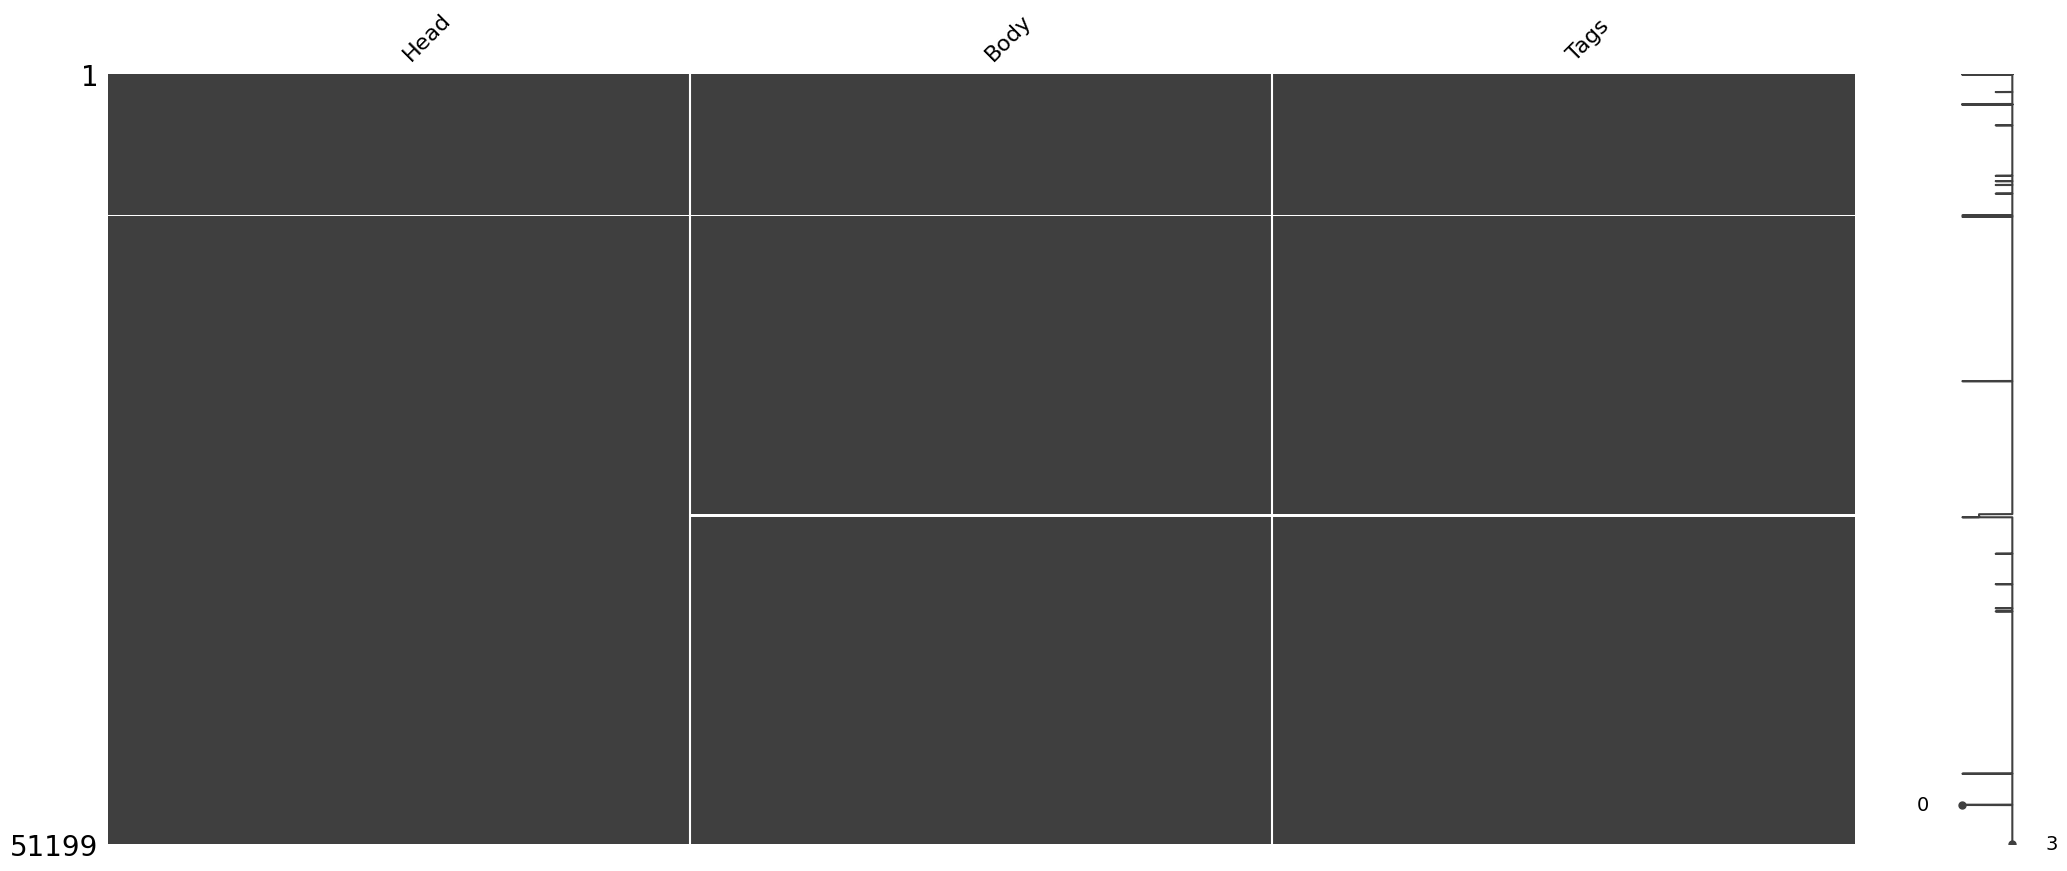

In [43]:
msno.matrix(wofa_df)

- We can se from the missing values distribution that both body and tags are common in the missing values.
- If we can drop these rows, we can get rid of most of the missing values without hampering the quality of the data, because we are doing a supervised learning task and we need the tags to be present.

<Axes: >

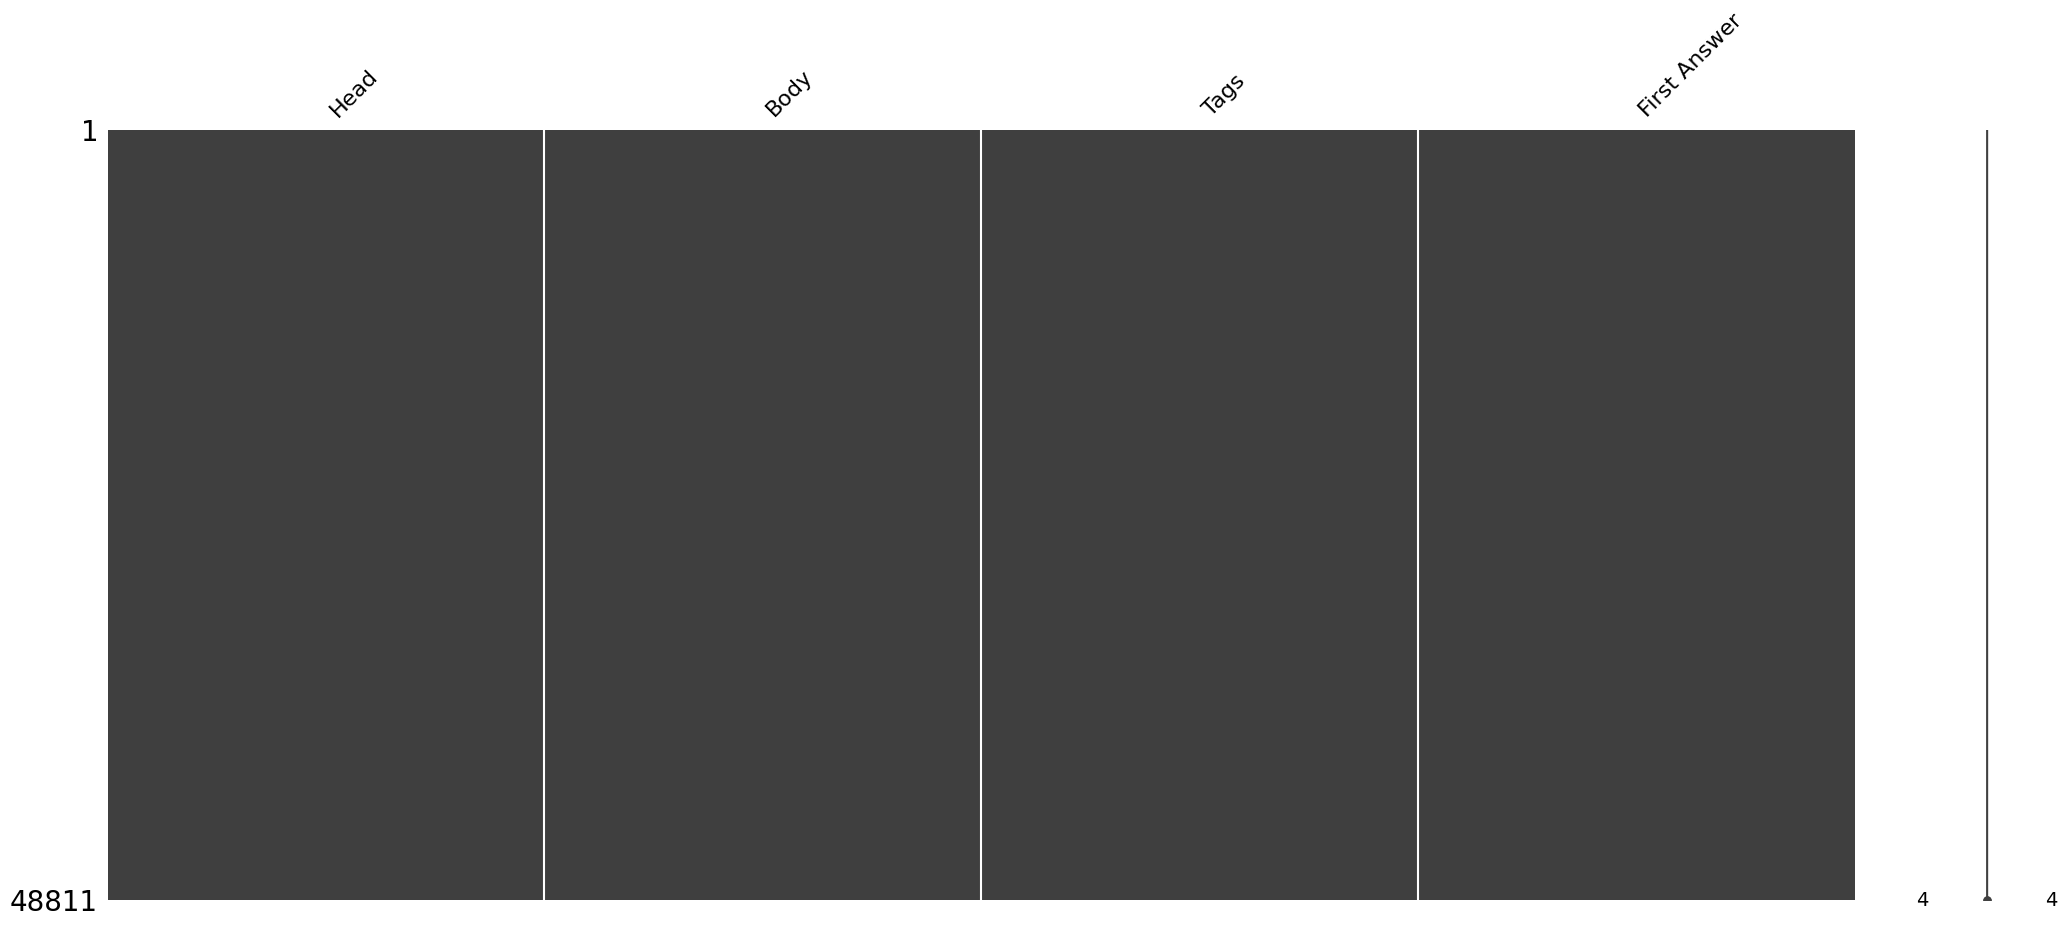

In [44]:
df['First Answer'].fillna('No Answer', inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
msno.matrix(df)

* ### Now our data is in a good shape, we can start to do some analysis on it.

In [46]:
# Saving the cleaned data to a csv file

df.to_csv('Data/cleaned_data_part1.csv', index=False)